In [1]:
import sys

sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")

In [12]:
from workflow.v2_fastani_rep_to_closest_rep.a_create_jobs import V2FastAniRepToClosestRepCreateJobs
from workflow.external.gtdb_metadata import GtdbMetadataR207
from workflow.gunc_helper.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged
from tqdm import tqdm



In [3]:
DF_REP_REP = V2FastAniRepToClosestRepCreateJobs().output().maybe_read_cached()
DF_REP_REP.head()

[19/06/2023 08:59:36] - 97.4MiB = /srv/home/uqamussi/projects/gunc-chimeras/output/v2_fastani_rep_to_closest_rep/create_jobs_results.h5 -> /tmp/gunc-cache/srv/home/uqamussi/projects/gunc-chimeras/output/v2_fastani_rep_to_closest_rep/create_jobs_results.h5


,query,ref,ani,af
0,GCA_000007325.1,GCF_000163935.1,84.9972,0.705801
1,GCA_000007325.1,GCA_018457305.1,78.8787,0.500000
2,GCA_000007325.1,GCF_000160475.1,85.4970,0.720994
3,GCA_000007325.1,GCA_000007325.1,100.0000,0.998619
4,GCA_000007325.1,GCF_000158275.2,91.0779,0.820442


In [50]:
def get_closest_rep():
    out = dict()
    for row in tqdm(DF_REP_REP.itertuples(), total=len(DF_REP_REP)):
        if row.af < 0.5 or row.query == row.ref:
            continue

        if row.query in out:
            if row.ani > out[row.query][1]:
                out[row.query] = (row.ref, row.ani)
        else:
            out[row.query] = (row.ref, row.ani, row.af)

        if row.ref in out:
            if row.ani > out[row.ref][1]:
                out[row.ref] = (row.query, row.ani)
        else:
            out[row.ref] = (row.query, row.ani)
    return out

D_REP_TO_CLOSEST = get_closest_rep()

100%|██████████| 8354456/8354456 [00:08<00:00, 1027892.82it/s]


In [5]:

DF_META = GtdbMetadataR207().output().read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [20]:
D_GID_TO_REP = DF_META['gtdb_genome_representative'].to_dict()

In [6]:

DF_CSS = AggregateMaxCssLevelMerged().output().read_cached()
DF_CSS.head()

,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [8]:
BAC_NON_SP_REPS = set(DF_META[(DF_META['gtdb_representative'] == 'f') & (DF_META['domain'] == 'd__Bacteria')].index)
print(list(BAC_NON_SP_REPS)[0:10])
print(len(BAC_NON_SP_REPS))

['GCF_002984425.1', 'GCF_012928085.1', 'GCF_011063325.1', 'GCA_002390645.1', 'GCF_001726645.1', 'GCF_002976665.1', 'GCF_009390565.1', 'GCF_011007235.1', 'GCF_900039105.1', 'GCA_012521235.1']
249189


In [9]:
FAIL_GIDS = set(DF_CSS.index)
print(len(FAIL_GIDS))

35723


In [10]:
FAIL_NON_BAC_SP_REPS = FAIL_GIDS.intersection(BAC_NON_SP_REPS)
print(len(FAIL_NON_BAC_SP_REPS))

30321


In [11]:
ANI_NEW_SP = {'GCA_001509115.1', 'GCA_001695755.1', 'GCA_002728285.1', 'GCA_002731855.1', 'GCA_008668585.1', 'GCA_008668795.1', 'GCA_009493725.1', 'GCA_011523145.1', 'GCA_016707075.1', 'GCA_017394825.1', 'GCA_017465765.1', 'GCA_017515185.1', 'GCA_018056875.1', 'GCA_018239885.1', 'GCA_018363345.1', 'GCA_900759525.1', 'GCA_900761055.1', 'GCA_900765305.1', 'GCA_900765645.1', 'GCA_902528895.1', 'GCA_902593295.1', 'GCA_903846615.1', 'GCA_903931905.1', 'GCA_905200745.1', 'GCA_905214645.1', 'GCF_000698005.1', 'GCF_002929465.1'}

ANI_NEW_CLST = {'GCA_002291775.1', 'GCA_002703565.1', 'GCA_003487585.1', 'GCA_007096555.1', 'GCA_011523095.1', 'GCA_013213925.1', 'GCA_016939315.1', 'GCA_018370815.1', 'GCA_018383955.1', 'GCA_900548685.1', 'GCA_900549575.1', 'GCA_900756095.1', 'GCA_900760075.1', 'GCA_902363945.1', 'GCA_902388545.1', 'GCA_902539685.1', 'GCA_902568005.1', 'GCA_902573475.1', 'GCA_902619155.1', 'GCA_905193315.1', 'GCA_905208535.1', 'GCA_905212495.1', 'GCA_905214135.1', 'GCA_905214255.1', 'GCA_905215365.1', 'GCF_000964075.1', 'GCF_001812365.1', 'GCF_001815585.1', 'GCF_002035805.1', 'GCF_002835625.1', 'GCF_002912425.1', 'GCF_002913635.1', 'GCF_003462845.1', 'GCF_003495765.1', 'GCF_008269775.1', 'GCF_009493905.1', 'GCF_009494015.1', 'GCF_009649595.1', 'GCF_014284905.1', 'GCF_015667745.1', 'GCF_016806285.1', 'GCF_016806405.1', 'GCF_017151305.1', 'GCF_018499505.1', 'GCF_902845755.1'}

print(len(ANI_NEW_SP), print(len(ANI_NEW_CLST)))
ALL_DIFF = ANI_NEW_SP.union(ANI_NEW_CLST)

ANI_NO_CHANGE = FAIL_NON_BAC_SP_REPS - ALL_DIFF
print(len(ANI_NO_CHANGE))

45
27 None
30249


In [51]:
# Find the average distance between the existing rep, and the new rep

def calculate_for_genome_set(genomes):
    out = list()
    for genome in genomes:
        cur_rep = D_GID_TO_REP[genome][3:]
        if cur_rep not in D_REP_TO_CLOSEST:
            # out.append(0.0)
            pass
        else:
            cur_rep_ani = D_REP_TO_CLOSEST[cur_rep][1]
            out.append(cur_rep_ani)
    return out

LST_NO_CHANGE = calculate_for_genome_set(ANI_NO_CHANGE)
LST_NEW_SP = calculate_for_genome_set(ANI_NEW_SP)
LST_NEW_CLST = calculate_for_genome_set(ANI_NEW_CLST)

In [56]:
import numpy as np

print(f'No change ({len(LST_NO_CHANGE):,}): u={100-np.mean(LST_NO_CHANGE):.2f} +/- {np.std(LST_NO_CHANGE):.2f}')
print(f'New species cluster ({len(LST_NEW_SP):,}): u={100-np.mean(LST_NEW_SP):.2f} +/- {np.std(LST_NEW_SP):.2f}')
print(f'changed species ({len(LST_NEW_CLST):,}): u={100-np.mean(LST_NEW_CLST):.2f} +/- {np.std(LST_NEW_CLST):.2f}')

No change (26,830): u=7.60 +/- 4.02
New species cluster (20): u=9.15 +/- 5.14
changed species (43): u=4.81 +/- 0.77


<Axes: ylabel='Count'>

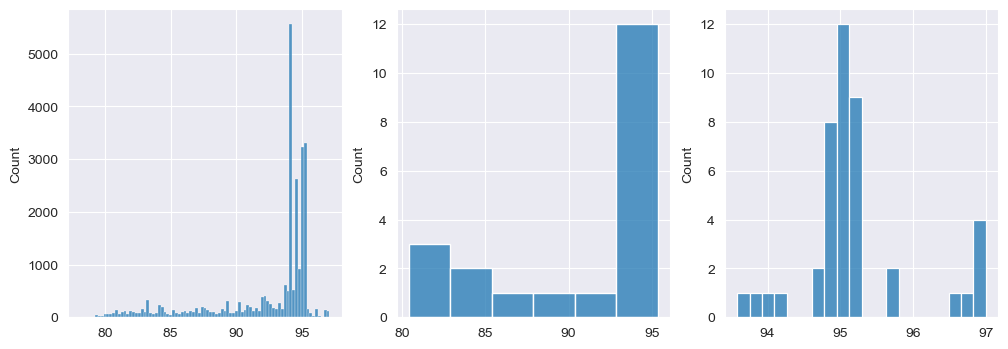

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(LST_NO_CHANGE, ax=ax1)
sns.histplot(LST_NEW_CLST, ax=ax3)
sns.histplot(LST_NEW_SP, ax=ax2)



In [57]:
from workflow.external.gtdb_sp_clusters import GtdbSpClustersR207

# What is the radius of the existing species clusters?
DF_SP_CLUST = GtdbSpClustersR207().output().maybe_read_cached()
DF_SP_CLUST.head()

[19/06/2023 09:48:00] - 2.3MiB = /srv/home/uqamussi/projects/gunc-chimeras/output/external/gtdb.r207.sp_clusters.h5 -> /tmp/gunc-cache/srv/home/uqamussi/projects/gunc-chimeras/output/external/gtdb.r207.sp_clusters.h5


,rep_genome,taxonomy,ani_radius,ani_mean,ani_min,af_mean,af_min,n_genomes
species,,,,,,,,
s__0-14-0-10-38-17 sp002774085,GB_GCA_002774085.1,d__Bacteria;p__Patescibacteria;c__Microgenomat...,95.0,NaN,NaN,NaN,NaN,1
s__0-14-0-20-30-16 sp002779075,GB_GCA_002779075.1,d__Archaea;p__Iainarchaeota;c__Iainarchaeia;o_...,95.0,NaN,NaN,NaN,NaN,1
s__0-14-0-20-30-16 sp903916665,GB_GCA_903916665.1,d__Archaea;p__Iainarchaeota;c__Iainarchaeia;o_...,95.0,NaN,NaN,NaN,NaN,1
s__0-14-0-20-34-12 sp002779065,GB_GCA_002779065.1,d__Archaea;p__Iainarchaeota;c__Iainarchaeia;o_...,95.0,NaN,NaN,NaN,NaN,1
s__0-14-0-20-40-13 sp002774285,GB_GCA_002774285.1,d__Bacteria;p__Patescibacteria;c__WWE3;o__0-14...,95.0,NaN,NaN,NaN,NaN,1


In [62]:
def get_gid_to_radius():
    out= dict()
    for row in DF_SP_CLUST.itertuples():
        out[row.rep_genome[3:]] = row.ani_radius
    return out


D_GID_TO_RADIUS = get_gid_to_radius()

In [69]:
# Find the average distance between the existing rep, and the new rep

def calculate_for_genome_set_radii(genomes, name):
    out_green, out_blue = list(), list()
    for genome in genomes:
        cur_rep_green_long = D_GID_TO_REP[genome]
        cur_rep_green_short = cur_rep_green_long[3:]
        radius_green = D_GID_TO_RADIUS[cur_rep_green_short]

        out_green.append(radius_green)

        if cur_rep_green_short not in D_REP_TO_CLOSEST:
            continue
        else:
            cur_blue_short = D_REP_TO_CLOSEST[cur_rep_green_short][0]
            radius_blue = D_GID_TO_RADIUS[cur_blue_short]
            out_blue.append(radius_blue)

    print('-' * 80)
    print(f'{name} ({len(genomes):,})')
    print(f'Green: u={np.mean(out_green):.1f} +/- {np.std(out_green):.1f}')
    print(f'Blue: u={np.mean(out_blue):.1f} +/- {np.std(out_blue):.1f}')
    print('-' * 80)
    return


calculate_for_genome_set_radii(ANI_NO_CHANGE, 'no change')
calculate_for_genome_set_radii(ANI_NEW_SP, 'new sp cluster')
calculate_for_genome_set_radii(ANI_NEW_CLST, 'changed species')

--------------------------------------------------------------------------------
no change (30,249)
Green: u=95.1 +/- 0.2
Blue: u=95.1 +/- 0.2
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
new sp cluster (27)
Green: u=95.0 +/- 0.1
Blue: u=95.0 +/- 0.1
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
changed species (45)
Green: u=95.3 +/- 0.6
Blue: u=95.4 +/- 0.6
--------------------------------------------------------------------------------


In [58]:
# Get the average distance from the cleaned genome to its existing rep and then to the new rep



NameError: name 'LST_NO_CHANGE_RAD' is not defined